In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


***
Auto Encoder
***
아주 간단하면 강력한 비지도 학습 딥러닝 모델로 입력값을 압축시킨 후,  
다시 압축된 정보를 복원해서 입력값과 동일한 출력값을 가지도록 리턴하는 학습 모델이다.  
학습 과정을 통해 최대한 입력값과 출력값이 일치하도록 모델에 파라미터가 최적화되고 오토인코더에 압축된 정보는 입력값에서 노이즈가 제거된  
핵심 특징들로 구성된 저차원 데이터로 간주돼 차원 축소 목적으로 오토인코더가 많이 사용된다.  

<img src="./오토인코더.png">

***
오토 인코더는 크게 인코더와 디코더로 구분되어 있고, 인코더와 디코더 사이에 압축된 정보가 존재한다.
인코더와 디코더는 덴즈 레이어로 구성되어있고, 인코더와 디코더 사이에는 입력되는 원본 값보다 작은 차원을 가지는 덴즈 레이어를 두어 정보를 압축한다.

MNIST 손글씨 데이터를 오토 인코더를 사용해서 차원 축소 후 시각화한다.
***

***
MNIST 손글씨 데이터를 획득한다.
***

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


***
데이터 전처리
***
획득된 학습 데이터는 오토 인코더 학습에 사용하고 테스트 데이터 중에서 500개의 데이터만 선택해 시각화에 사용한다.  


In [3]:
x_train = x_train.reshape(60000, 784) # 학습 데이터; 2차원 -> 1차원으로 차원축소


#테스트 데이터 중에서 500개의 데이터만 선택한다. -> 시각화에 사용한다.
x_test = x_test[:500]
x_test = x_test.reshape(500, 784) # 테스트 데이터; 2차원 -> 1차원으로 차원축소
y_test = y_test[:500]

# 데이터 정규화
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


***
오토 인코더 모델을 만든다.
***

In [4]:
input_ = tf.placeholder(dtype=tf.float32, shape=[ None , 784 ]) # 오토 인코더의 입력으로 사용할 placeholder
encoder = tf.layers.dense(input_, 128, tf.nn.tanh ) # 인코더
bottleNeck  = tf.layers.dense(encoder, 3) # 3차원으로 차원 축소, 압축
decoder = tf.layers.dense(bottleNeck, 128, tf.nn.tanh ) # 디코더
output_ = tf.layers.dense(decoder, 784, tf.nn.sigmoid)# 출력

***
손실함수와 Adam 옵티마이저
***

In [5]:
loss = tf.losses.mean_squared_error(labels=input_, predictions=output_) # 손실 함수
train = tf.train.AdamOptimizer(learning_rate=0.002).minimize(loss) # 최적화

***
학습시킨다.
***

In [6]:
tf.set_random_seed(35)

In [7]:
batch_size = 5000
iteration = len(x_train) // batch_size # 1 epoch 당 반복횟수; 미니배치 횟수

with tf.Session() as sess:
     sess.run(tf.global_variables_initializer())
     # 학습 시작
     for epoch in range(50):
          avg_loss = 0.0
          start = 0
          end = batch_size
          # 미니 배치 시작
          for i in range(iteration) :
               _, loss_ = sess.run( [train, loss], feed_dict={ input_ : x_train[start : end]} )
               start += batch_size
               end += batch_size
               avg_loss += loss_ / iteration
          #---- for i  -> 미니배치 종료
          print(' epoch -> {:2d}, loss_ ->  {:6.4f}'.format ( (epoch + 1) , avg_loss))
          
     #--- for epoch -> 학습 종료
     
     # 학습이 완료되면 오토 인코더를 사용해서 테스트 데이터가 3차원으로 압축한 벡터를 시각화를 위해 저장한다.
     bottleNeck_ = sess.run(bottleNeck, feed_dict={ input_ : x_test})

 epoch ->  1, loss_ ->  0.1852
 epoch ->  2, loss_ ->  0.0755
 epoch ->  3, loss_ ->  0.0679
 epoch ->  4, loss_ ->  0.0665
 epoch ->  5, loss_ ->  0.0644
 epoch ->  6, loss_ ->  0.0613
 epoch ->  7, loss_ ->  0.0588
 epoch ->  8, loss_ ->  0.0576
 epoch ->  9, loss_ ->  0.0570
 epoch -> 10, loss_ ->  0.0564
 epoch -> 11, loss_ ->  0.0560
 epoch -> 12, loss_ ->  0.0555
 epoch -> 13, loss_ ->  0.0549
 epoch -> 14, loss_ ->  0.0544
 epoch -> 15, loss_ ->  0.0538
 epoch -> 16, loss_ ->  0.0533
 epoch -> 17, loss_ ->  0.0529
 epoch -> 18, loss_ ->  0.0525
 epoch -> 19, loss_ ->  0.0521
 epoch -> 20, loss_ ->  0.0518
 epoch -> 21, loss_ ->  0.0515
 epoch -> 22, loss_ ->  0.0511
 epoch -> 23, loss_ ->  0.0508
 epoch -> 24, loss_ ->  0.0505
 epoch -> 25, loss_ ->  0.0502
 epoch -> 26, loss_ ->  0.0499
 epoch -> 27, loss_ ->  0.0496
 epoch -> 28, loss_ ->  0.0493
 epoch -> 29, loss_ ->  0.0491
 epoch -> 30, loss_ ->  0.0488
 epoch -> 31, loss_ ->  0.0485
 epoch -> 32, loss_ ->  0.0483
 epoch -

In [8]:
print(len(bottleNeck_))
print(type(bottleNeck_))
print(bottleNeck_)

500
<class 'numpy.ndarray'>
[[ 16.921803    -9.352464     1.4129751 ]
 [  1.7538826   -3.451288    -5.534069  ]
 [ 11.969399     0.24197763 -10.942491  ]
 ...
 [ 10.956893    -7.715967    -4.69407   ]
 [  8.091743   -17.402657   -12.436229  ]
 [  7.816182   -12.025375    -8.083796  ]]


***
압축된 데이터를 시각화한다.
***

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

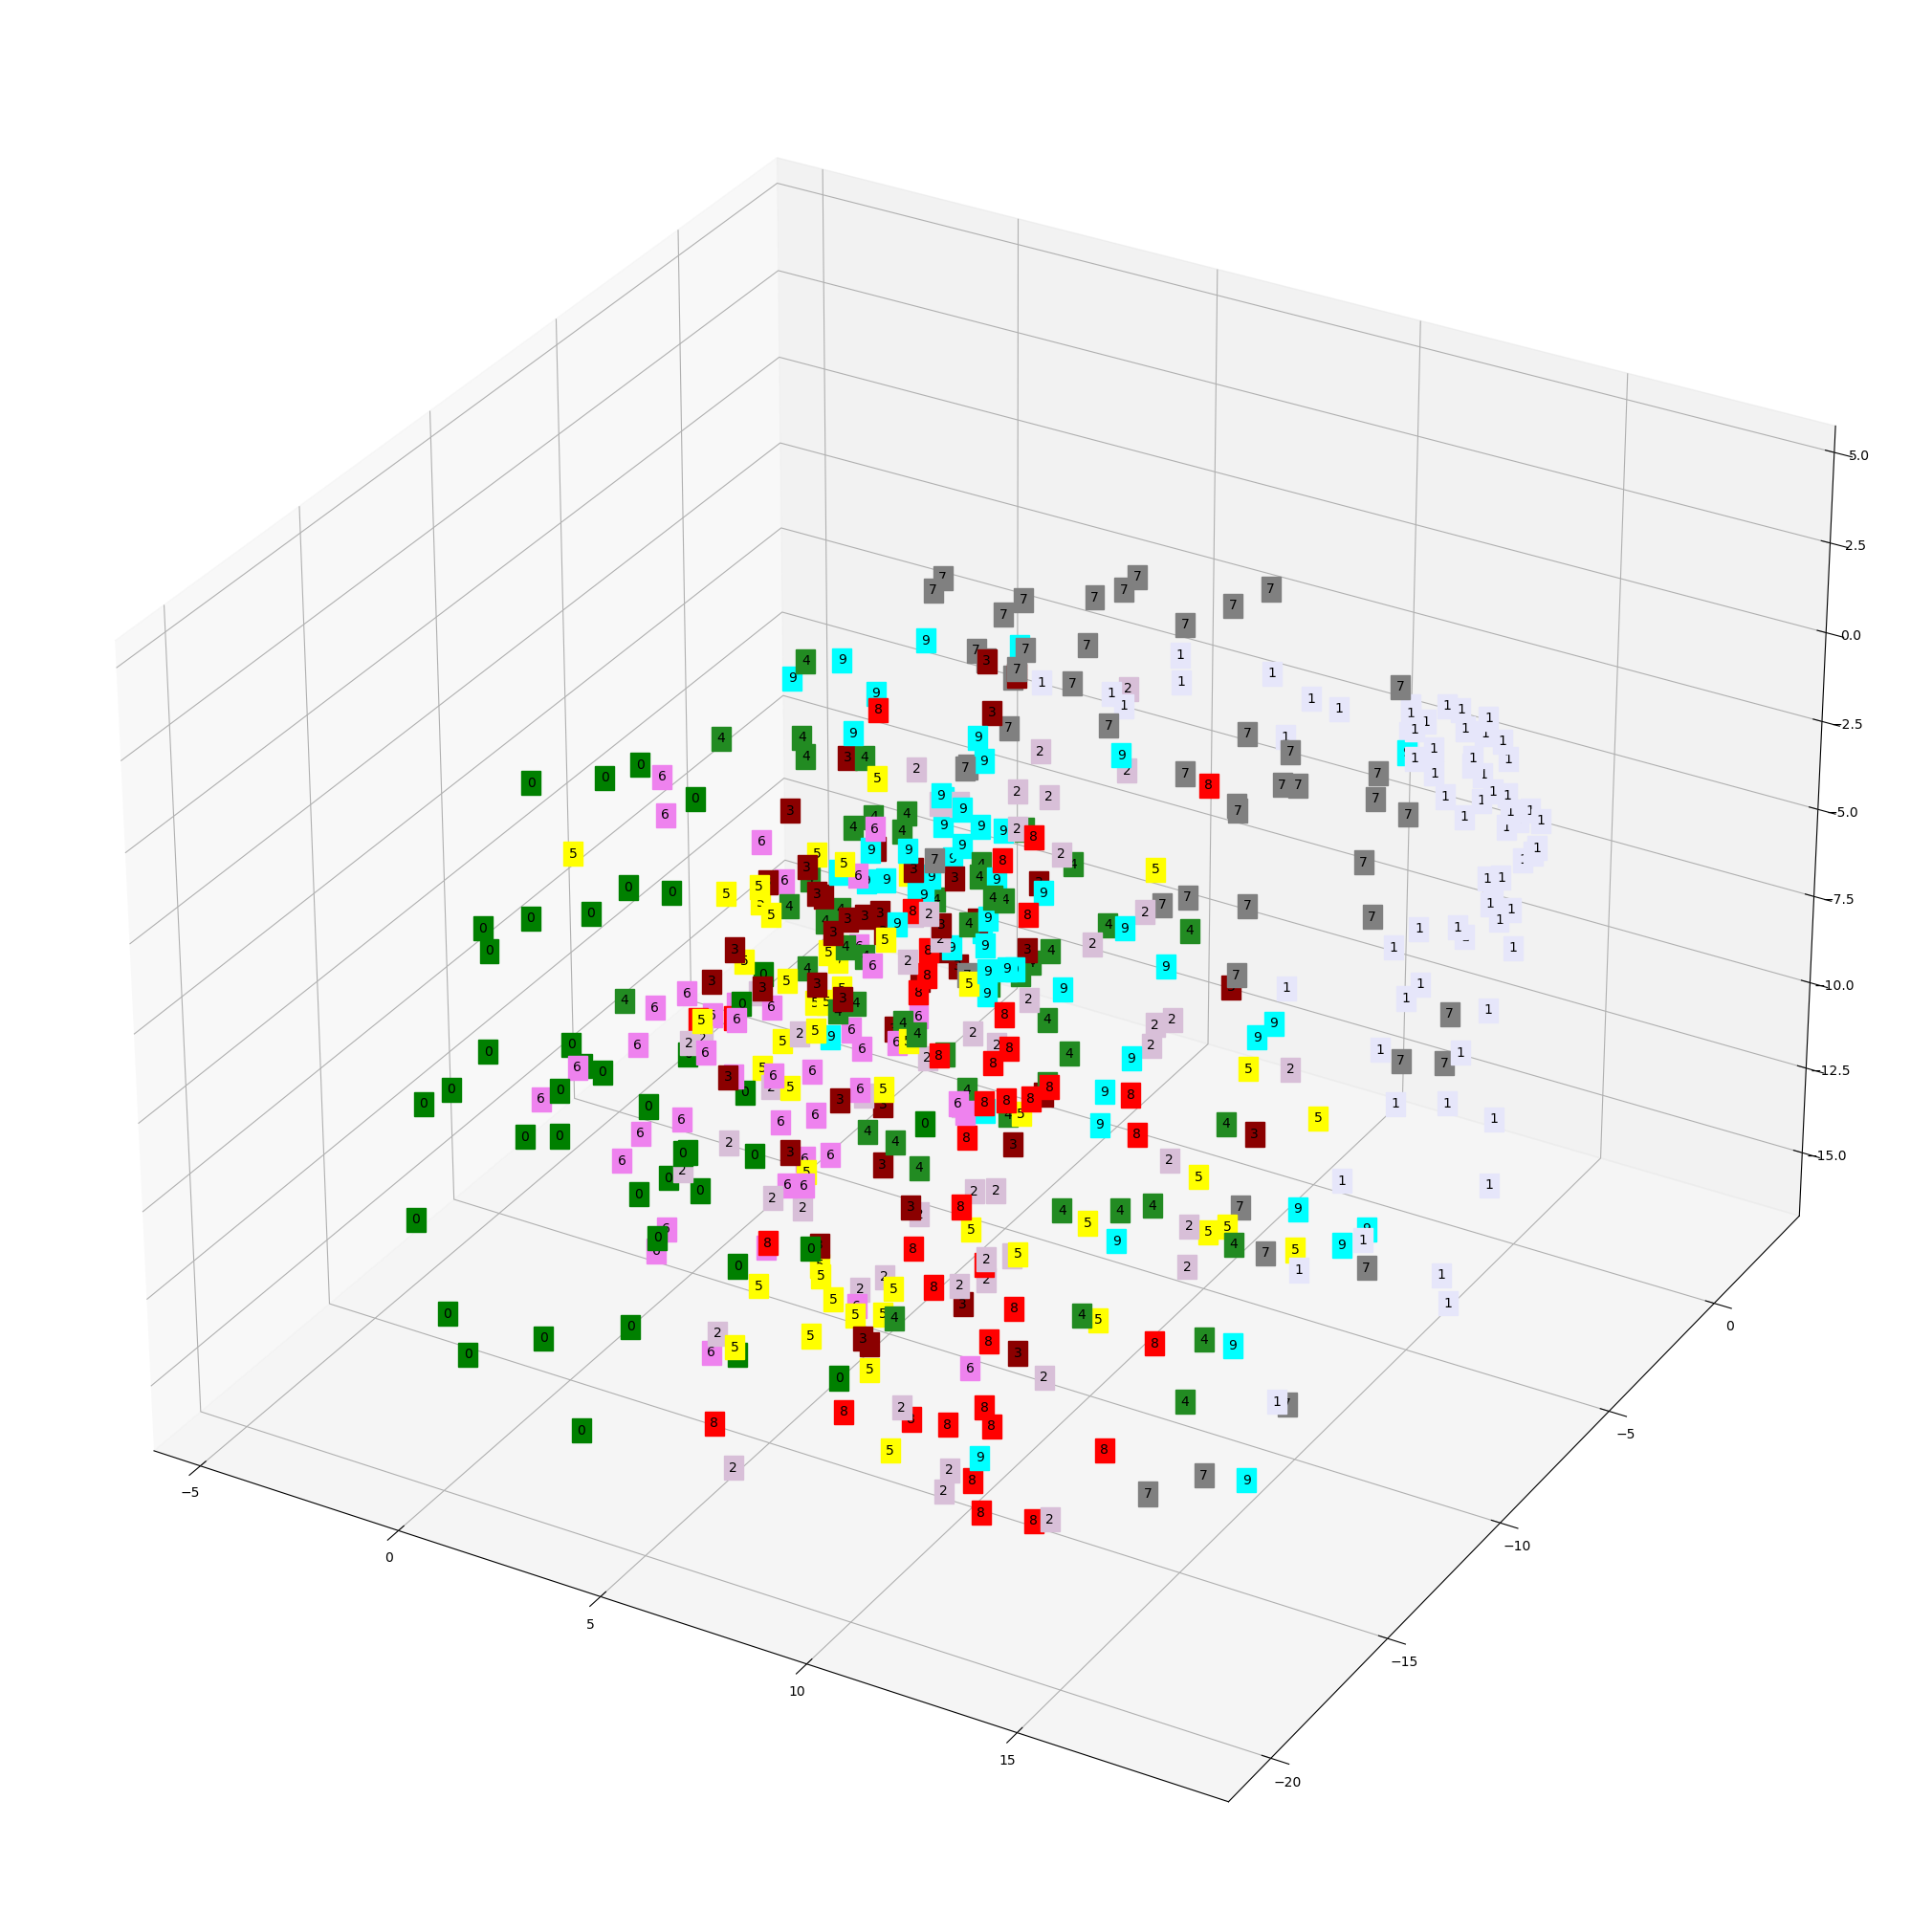

In [10]:
plt.figure(figsize=[40, 20])
fig = plt.figure(1)
ax = Axes3D(fig=fig)

xg = bottleNeck_[:, 0]
yg = bottleNeck_[:, 1]
zg = bottleNeck_[:, 2]

color = ['green', 'lavender', 'thistle', 'darkred', 'forestgreen', 'yellow', 'violet', 'gray', 'red', 'cyan']
for x, y, z, label in zip(xg, yg, zg, y_test):
     #print(x, y, z, label)
     c = color[int(label)]
     ax.text(x, y, z, label, backgroundcolor = c)

ax.set_xlim(xg.min(), xg.max())
ax.set_ylim(yg.min(), yg.max())
ax.set_zlim(zg.min(), zg.max())
plt.show()